# Count and measure Particles in SEM images

In [1]:
%pylab inline
import mahotas as mh
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 16

Populating the interactive namespace from numpy and matplotlib


### load image and show scale bar

Scale bar conversion factor: 2.04nm/px


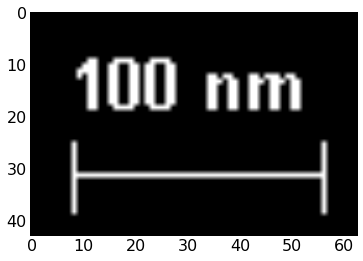

In [2]:
sem = mh.imread('data/red.tif')
figure() # datazone
figsize(4,3)
imshow(sem[710:-15,120:183])
gray()
# determine scale bar length in pixel
scalebarlength = sum(sem[710:-15,120:183][argmax(sum(sem[710:-15,120:183],axis=1)),:])/255
set_scale = 100/scalebarlength # xx nm scale bar length
print('Scale bar conversion factor: {:.2f}nm/px'.format(set_scale))

In [3]:
sum(sem[710:-15,120:183][argmax(sum(sem[710:-15,120:183],axis=1)),:])/255

49.0

### cut off SEM data zone

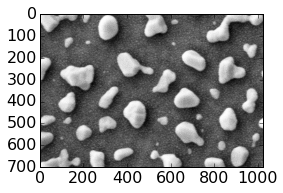

In [4]:
yimgarea = range(0,700)
sem = sem[yimgarea,:] # cut off SEM data field
figure()
figsize(8,6)
imshow(sem)
gray()

### create binary threshold image from gaussian blurred original image and identify regions

number of objects found: 42


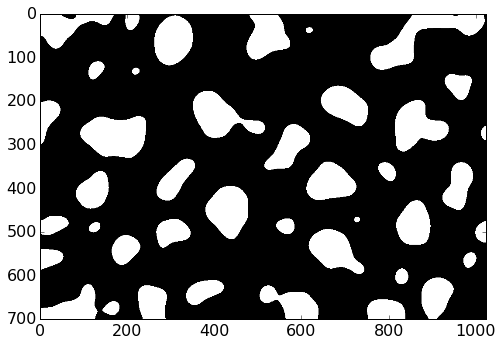

In [5]:
gaussem = mh.gaussian_filter(sem, 8).astype('uint8') # set gaussian filter as uint8
T = mh.thresholding.otsu(gaussem) # set threshold
imshow(gaussem > T)
labeled,nr_objects = mh.label(gaussem > T) # label objects
print("number of objects found: {}".format(nr_objects))

### Show overlay of regions found

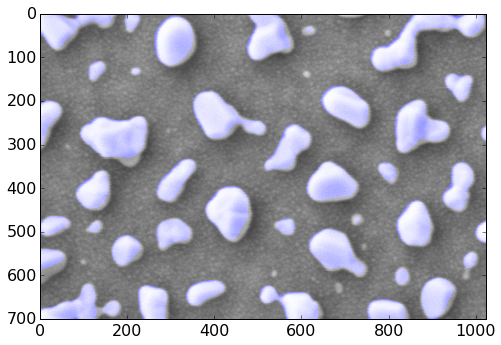

In [6]:
imshow(mh.overlay(sem, None, None, gaussem > T))

### create Histogram and calculate fill factor

Fillfactor: 24.4%


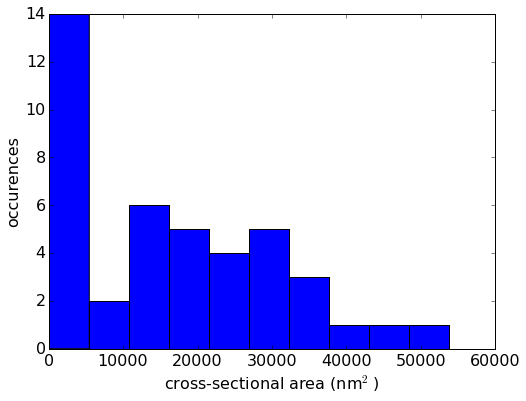

In [11]:
sizes = mh.labeled.labeled_size(labeled) # get size of labelled regions
figure()
figsize(8,6)
hist(sizes[1:]*set_scale**2,bins=10) # plot histogramm (exclude 1st since it is the black area)
fillfactor = sum(sizes[1:])/1.0/sem.size
xlabel('cross-sectional area (nm$^2$)')
ylabel('occurences')
print("Fillfactor: {:.1f}%".format(fillfactor*100))